# Reto Kaggle

### Equipo 4
- Mauricio Juárez Sánchez A01660336
- Alfredo Jeong Hyun Park A01658259
- Fernando Alfonso Arana Salas A01272933
- Miguel Ángel Bustamante Pérez A01781583

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Exploration and Preprocessing

> ### Lectura de dataset

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/mau-JS/databases/main/test.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/mau-JS/databases/main/train.csv')

In [4]:
df1_copy = df1.copy()

In [5]:
# Shape gives us the amount of rows and features
print("Complete training set: ", "Rows:", df2.shape[0], ", Columns: ", df2.shape[1])
print("Testing set w/o 'Survivor' column: ", "Rows:", df1.shape[0], ", Columns: ", df1.shape[1])
print("Attributes: ", df1.columns.tolist())

# Each row represents one person. There is 12 original attributes p/person:
# 'PassengerId', 'Survived', 'Pclass',
# 'Name', 'Sex', 'Age', 'SibSp',
# 'Parch', 'Ticket', 'Fare',
# 'Cabin', 'Embarked'

Complete training set:  Rows: 891 , Columns:  12
Testing set w/o 'Survivor' column:  Rows: 418 , Columns:  11
Attributes:  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
# Dropping the 'PassengerId' because it's just the index.
df1 = df1.drop("PassengerId", axis=1)
df2 = df2.drop("PassengerId", axis=1)

> ### Guardado en dataframe de la dataset

In [7]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.dropna(subset=['Survived'], inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)

> ### Data Exploration

In [8]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [9]:
df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0.0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1.0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0.0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1.0
890,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0.0


### Columns description

| <h2>Attribute</h2> | <h2>Description</h2> |
| ---|---|
| <h3>**Pclass**</h3> | <h5>Ticket class (First class, Second class and Third class)</h5> |
| <h3>**Name**</h3> | <h5>Person's name</h5> |
| <h3>**SibSp**</h3> | <h5># of siblings / spouses aboard the Titanic</h5> |
| <h3>**Parch**</h3> | <h5># of parents / children aboard the Titanic</h3> |
| <h3>**Fare**</h3> | <h5>Passenger fare</h5> |
| <h3>**Sex**</h3> | <h5>Sex of a person</h5> |
| <h3>**Age**</h3> | <h5>Age of a person</h5> |
| <h3>**Ticket**</h3> | <h5>Ticket number</h5> |
| <h3>**Cabin**</h3> | <h5>Cabin number</h5> |
| <h3>**Embarked**</h3> | <h5>Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton</h5> |

In [10]:
info = df.info()
print(info)

# The info() method is useful to get a quick description of the
# data. We've 891 entries, each attribute’s
# type, and the number of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 76.7+ KB
None


In [11]:
# We can see a summary of the NUMERICAL ATTRIBUTES
describe = df.describe()
print(describe)

# NOTE:
# => AGE:
# - Mean age of passengers is 29 years old.

# => FARE:
# - Mean Fare price of ticket is $32. There's a very high standard deviation.
# - We have 'Fare price tickets' of $0. Which makes no sense.
# - We'll explore this further on the notebook.

# => PCLASS:
# - Mean passenger class is 2nd class.

           Pclass         Age       SibSp       Parch        Fare    Survived
count  891.000000  714.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208    0.383838
std      0.836071   14.526497    1.102743    0.806057   49.693429    0.486592
min      1.000000    0.420000    0.000000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400    0.000000
50%      3.000000   28.000000    0.000000    0.000000   14.454200    0.000000
75%      3.000000   38.000000    1.000000    0.000000   31.000000    1.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200    1.000000


In [12]:
# We can see the value counts for each column, this is useful specially
# for the CATEGORICAL ATTRIBUTES in the dataset. In other words, we found
# out what categories exist and how many belong to each category:
for i in df.columns:
    print("//////////////////////////////////////////////////////\n")
    print(i, " column:\n", df[i].value_counts())
    print("\n//////////////////////////////////////////////////////\n")

//////////////////////////////////////////////////////

Pclass  column:
 3    491
1    216
2    184
Name: Pclass, dtype: int64

//////////////////////////////////////////////////////

//////////////////////////////////////////////////////

Name  column:
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

//////////////////////////////////////////////////////

//////////////////////////////////////////////////////

Sex  column:
 male      577
female    314
Name: Sex, dtype: int64

/////////////////////

Pclass has 0 missing values
Name has 0 missing values
Sex has 0 missing values
Age has 177 missing values
SibSp has 0 missing values
Parch has 0 missing values
Ticket has 0 missing values
Fare has 0 missing values
Cabin has 687 missing values
Embarked has 2 missing values
Survived has 0 missing values


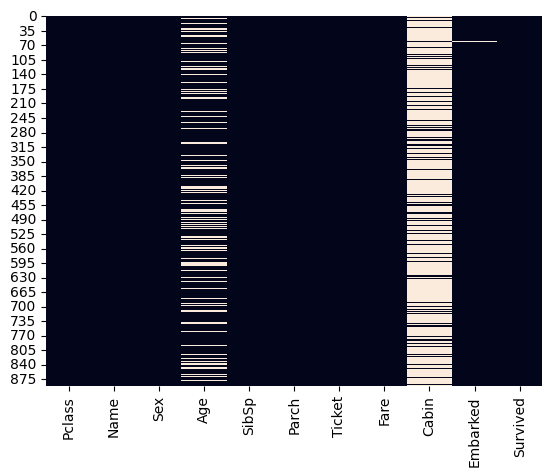

In [13]:
#Visualizing missing data
sns.heatmap(df.isnull(), cbar=False)

# Checks missing values for all attributes
for i in df.columns:
  missing_values = df[i].isna()
  print(f'{i} has {missing_values.sum()} missing values')

# NOTE:
# Cabin has 687 missing entries.
# Age has 177 missing entries.
# Embarked has 2 missing entries.

In [14]:
# We can see the MALE to FEMALE ratio
print("Porcentage of male: ", round(577/891 * 100, 2), "%")
print("Porcentage of female: ", round(314/891 * 100, 2), "%")

Porcentage of male:  64.76 %
Porcentage of female:  35.24 %


In [15]:
# We can see the survival label objective [0 = 'No', 1 = 'Yes']
print("Porcentage of survival: ", round(549/891 * 100, 2), "%")
print("Porcentage of no-survival: ", round(342/891 * 100, 2), "%")

Porcentage of survival:  61.62 %
Porcentage of no-survival:  38.38 %


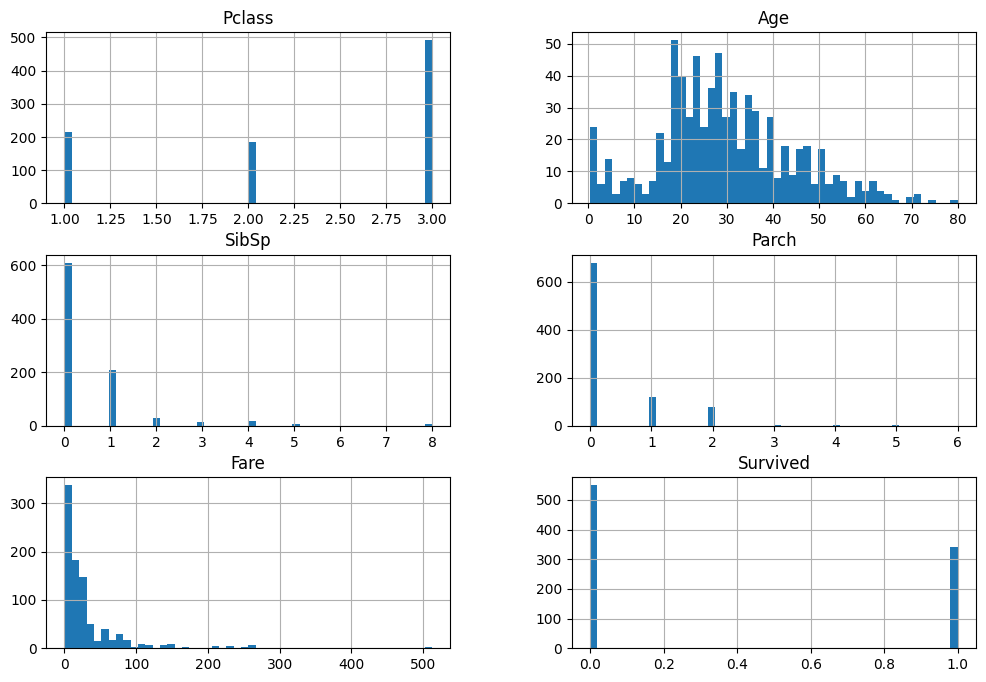

In [16]:
# To get a feel of the type of data we're dealing with, we plotted a histogram
# for each of the NUMERICAL ATTRIBUTES. A histogram shows us the number of
# instances (on vertical axis) that have a given value range (horizontal axis).
df.hist(bins=50, figsize=(12,8))
plt.show()

# NOTES:.
# 'Fare' and 'Age','SibsSp', 'Parch' histograms are skewed left (have heavy tails): they
# extend much farther to the left of the median than to the right. This may make it a bit harder
# for some ML models to detect patterns. We'll transform these attributes to a symmetrical and
# bell-shaped distributions.

### Check for outliers

First let's check the boxplots for the columns that we think may have outliers that have a significant impact in the predictions.

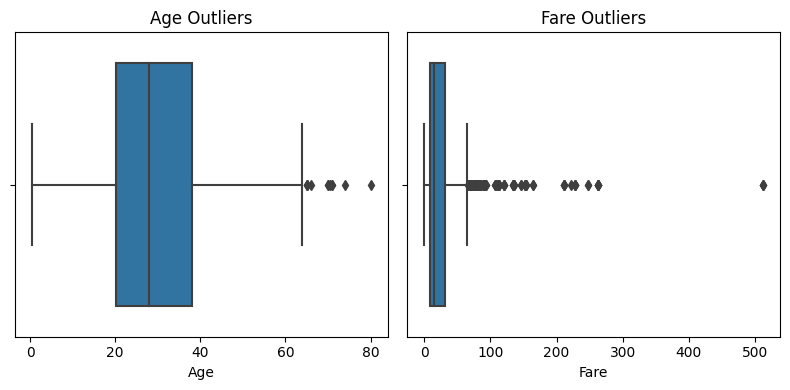

In [17]:
# Search for outliers.
# We'll search for outliers in two ways. First, as scatter plot between pairs of ('A', 'B')
# attributes, for each [A, B] in the dataset. Second, using a boxplot from seaborn library.
# Seaborn library has boxplots that show that there are outliers in the those columns.

# AGE & FARE
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
age_box_plot = sns.boxplot(x=df['Age'], ax=axs[0])
age_box_plot.set_title('Age Outliers')

fare_box_plot = sns.boxplot(x=df['Fare'], ax=axs[1])
fare_box_plot.set_title('Fare Outliers')
plt.tight_layout()
plt.show()

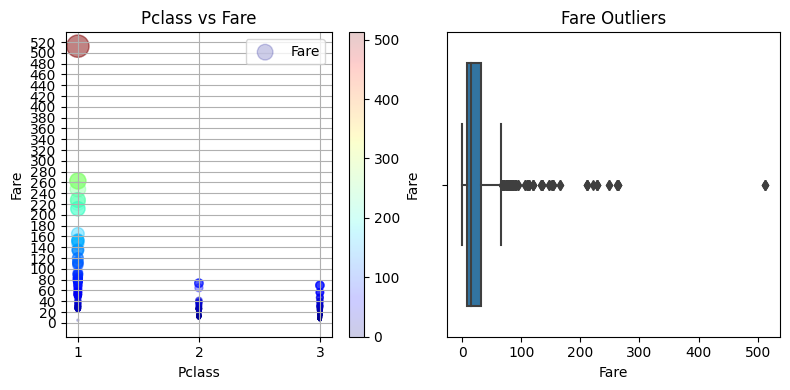

In [18]:
# # Analyzing 'Fare' and 'Pclass'
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot: first subplot
scatter_plot = df.plot(kind="scatter", x="Pclass", y="Fare", grid=True,
                             alpha=0.2, s=df["Fare"] / 2, label="Fare",
                             legend = True, sharex = False, colorbar = True,
                             cmap = "jet", c = "Fare", ax=axs[0])
scatter_plot.set_yticks(range(0, int(df["Fare"].max()) + 10, 20))
scatter_plot.set_xticks(range(1, 4))
scatter_plot.set_title('Pclass vs Fare')

# Box plot: second subplot
box_plot = sns.boxplot(x=df['Fare'], ax=axs[1])
box_plot.set_title('Fare Outliers')
box_plot.set_xlabel('Fare')
plt.tight_layout() # Adjust spacing between subplots to prevent overlap
plt.show()

# This graph have interesting observations. At first glance, we can see that
# 'fare prices' for 2nd and 3rd classes are very much the same. The 1st class
# 'fare prices' is the most variated ones. We see that some 1st class tickets
# were sold for the same price as 1st and 2nd classes, but some 1st class
# tickets were sold for a very different (and high) price.

Text(0.5, 1.0, 'Embarked vs Fare')

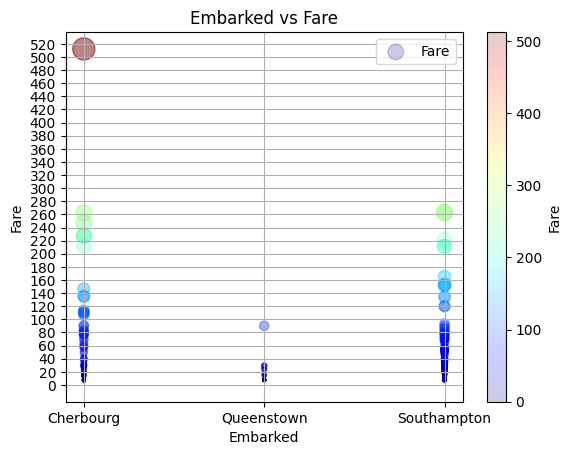

In [19]:
# Embarked <===> Fare

# Encoding Port of Embarcation: Embarked C = Cherbourg, Q = Queenstown, S = Southampton
# To 1 = Cherbourg, 2 = Queenstown, 3 = Southampton
df['Embarked'] = df['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])

# Analyzing 'Embarked' and 'Fare'
# Scatter plot: first subplot
scatter_plot = df.plot(kind="scatter", x="Embarked", y="Fare", grid=True,
                             alpha=0.2, s=df["Fare"] / 2, label="Fare",
                             legend = True, sharex = False, colorbar = True,
                             cmap = "jet", c = "Fare")
scatter_plot.set_yticks(range(0, int(df["Fare"].max()) + 10, 20))
scatter_plot.set_xticks(range(1, 4), labels=['Cherbourg', 'Queenstown', 'Southampton'])
scatter_plot.set_title('Embarked vs Fare')

Text(0.5, 1.0, 'Sex vs Fare')

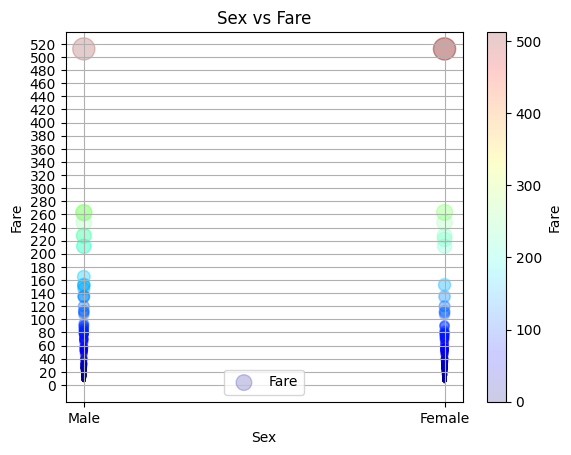

In [20]:
# Sex <===> Fare

# Encoding Sex: Male, Female
# To 1 = Male, 0 = Female
df['Sex'] = df['Sex'].replace(['male', 'female'], [1, 0])

# Analyzing 'Sex' and 'Fare'
# Scatter plot: first subplot
scatter_plot = df.plot(kind="scatter", x="Sex", y="Fare", grid=True,
                             alpha=0.2, s=df["Fare"] / 2, label="Fare",
                             legend = True, sharex = False, colorbar = True,
                             cmap = "jet", c = "Fare")
scatter_plot.set_yticks(range(0, int(df["Fare"].max()) + 10, 20))
scatter_plot.set_xticks(range(0, 2), labels=['Male', 'Female'])
scatter_plot.set_title('Sex vs Fare')

In [21]:
# We have to drop 'categorical features' since correlation works only with numerical attributes.
df.drop(labels=['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [22]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,3.0,0.0
1,1,0,38.0,1,0,71.2833,1.0,1.0
2,3,0,26.0,0,0,7.9250,3.0,1.0
3,1,0,35.0,1,0,53.1000,3.0,1.0
4,3,1,35.0,0,0,8.0500,3.0,0.0


### Imputing values

In [23]:
# Preparing data for imputing
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X_imputed = imputer.transform(X)
X = pd.DataFrame(X_imputed)
df = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
df.rename(columns={0: 'Pclass', 1: 'Sex', 2: 'Age',3:'SibSp',4:'Parch',5:'Fare', 6:'Embarked'}, inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,3.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,3.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,3.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,3.0,0.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,3.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,3.0,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,3.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0


### Removing Outliers with IQR

---

In [25]:
# Function that computes the IQR
def outlier_thresholds(df, col_name):
    data_qtles = df.describe()
    q1 = data_qtles[col_name]['25%']
    q3 = data_qtles[col_name]['75%']
    IQR = q3-q1
    up_limit = q3 + 1.5*IQR
    low_limit = q1 - 1.5*IQR
    return low_limit, up_limit

In [26]:
# Print all the thresholds for all the columns in the dataset
#Consider removing age outlier
df
columns = ['Age','Fare']
for i in columns:
    print(f"Thresholds in column {i}: {outlier_thresholds(df,i)}")

Thresholds in column Age: (2.5, 54.5)
Thresholds in column Fare: (-26.724, 65.6344)


In [27]:
low, up = outlier_thresholds(df, "Age")
'''
Use the limits to filter all the rows in the diabetes dataframe where the values in the Pregnancies column
are lower that the low limit and higher than the up limit, selecting the outliers in that column.
'''

# Filter rows
df = df[(df['Age'] >= low) & (df['Age'] <= up)]

In [28]:
low, up = outlier_thresholds(df, "Fare")
# Filter rows
df = df[(df['Fare'] >= low) & (df['Fare'] <= up)]

In [29]:
# Show the dataframe without outliers in the Fare and Age columns
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,3.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,3.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,3.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,3.0,0.0
5,3.0,1.0,28.0,0.0,0.0,8.4583,2.0,0.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,3.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,3.0,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,3.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0


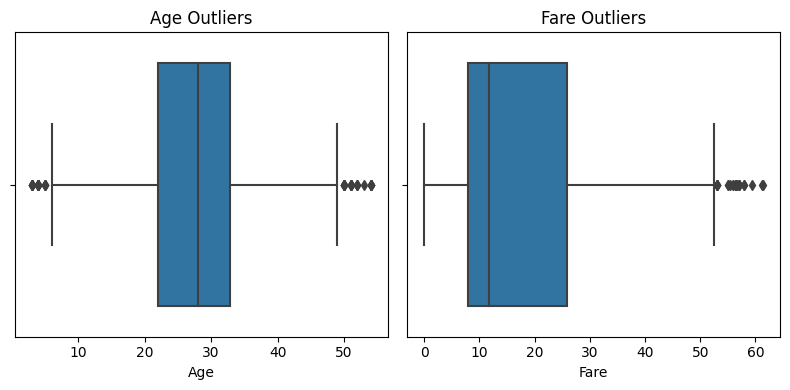

In [30]:
# Visualizing again the seaborn boxplot for outliers
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
age_box_plot = sns.boxplot(x=df['Age'], ax=axs[0])
age_box_plot.set_title('Age Outliers')

fare_box_plot = sns.boxplot(x=df['Fare'], ax=axs[1])
fare_box_plot.set_title('Fare Outliers')
plt.tight_layout()
plt.show()

As we can see the boxplots now have a better shape and less outliers due to the IQR.

---

### Correlation Matrix

In [31]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,3.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,3.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,3.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,3.0,0.0
5,3.0,1.0,28.0,0.0,0.0,8.4583,2.0,0.0
...,...,...,...,...,...,...,...,...
886,2.0,1.0,27.0,0.0,0.0,13.0000,3.0,0.0
887,1.0,0.0,19.0,0.0,0.0,30.0000,3.0,1.0
888,3.0,0.0,28.0,1.0,2.0,23.4500,3.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0


In [32]:
correlation_matrix = df.corr()
print(correlation_matrix)

            Pclass       Sex       Age     SibSp     Parch      Fare  \
Pclass    1.000000  0.047501 -0.304298  0.081530  0.072351 -0.594245   
Sex       0.047501  1.000000  0.095778 -0.154852 -0.290666 -0.158140   
Age      -0.304298  0.095778  1.000000 -0.287650 -0.129590  0.098611   
SibSp     0.081530 -0.154852 -0.287650  1.000000  0.392197  0.376443   
Parch     0.072351 -0.290666 -0.129590  0.392197  1.000000  0.320864   
Fare     -0.594245 -0.158140  0.098611  0.376443  0.320864  1.000000   
Embarked  0.005355  0.082370  0.048529  0.052548  0.025915 -0.027966   
Survived -0.268318 -0.509660 -0.063606  0.002503  0.070732  0.247519   

          Embarked  Survived  
Pclass    0.005355 -0.268318  
Sex       0.082370 -0.509660  
Age       0.048529 -0.063606  
SibSp     0.052548  0.002503  
Parch     0.025915  0.070732  
Fare     -0.027966  0.247519  
Embarked  1.000000 -0.104661  
Survived -0.104661  1.000000  


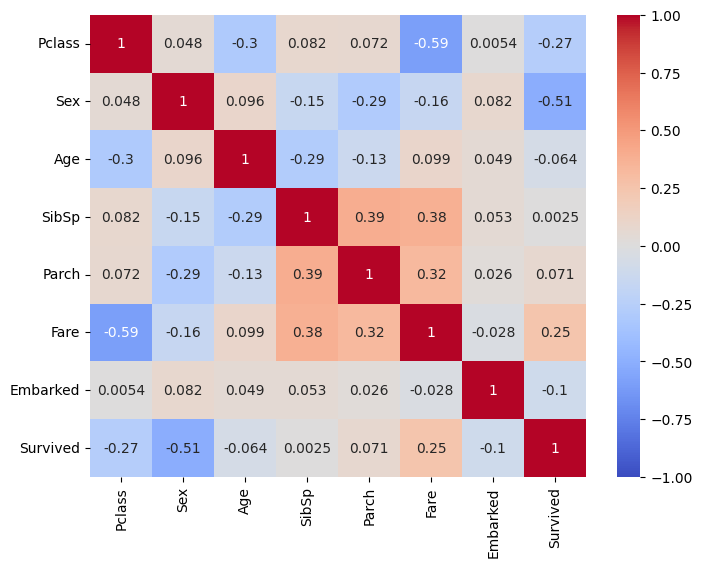

In [33]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Identifying unbalanced datasets

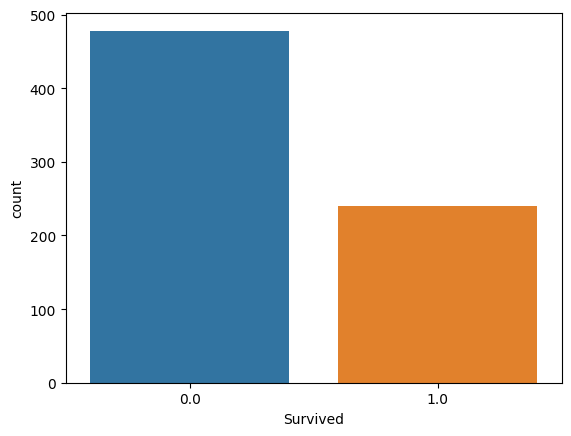

In [34]:
#Survived histogram visualization for identifying unbalanced datasets.
sns.countplot(x=df['Survived'])
plt.show()

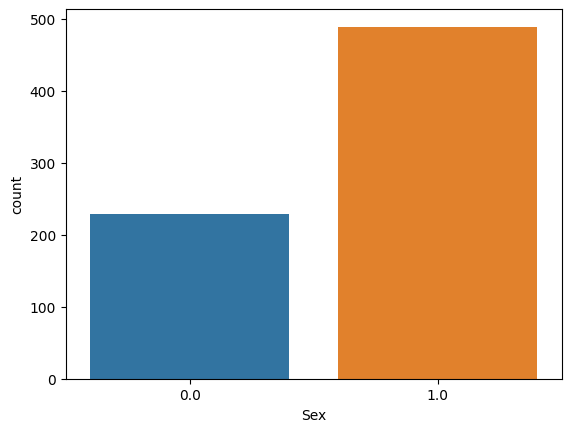

In [35]:
#Sex histogram visualization
sns.countplot(x=df['Sex'])
plt.show()

#### Scaling the data

This is useful to work with algorithms that are sensitive to the scale of the data like svm or linear regression.

In [36]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Survived', axis = 1)
y = df['Survived']
scaler = StandardScaler()
#Scaling the fare data to work with k neighbors, support vector machines and logistic regression.
feature = df['Fare']
scaled_feature = scaler.fit_transform(feature.values.reshape(-1,1))
df['Fare'] = scaled_feature

#Scaling the age data to work with k neighbors, support vector machines and logistic regression.
feature2 = df['Age']
scaled_feature2 = scaler.fit_transform(feature2.values.reshape(-1,1))
df['Age'] = scaled_feature2
#For predictions we need to transform back:
#original_feature = scaler.inverse_transform(scaled_feature)

### **Checking if our dataset is balanced**
#### 'Survived' column is our main interest, as such we will check if the data on this column is balanced.

In [37]:
class_counts = df['Survived'].value_counts()
print(class_counts)

0.0    478
1.0    240
Name: Survived, dtype: int64


#### Our dataset is not balanced, therefore we will apply oversampling to balance our dataset.

---

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
#This is our training data with oversampling
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,-0.207827,2.0,0.0,-0.644543,3.0
1,1.0,1.0,0.891580,1.0,1.0,2.671722,3.0
2,3.0,1.0,-0.007934,1.0,0.0,-0.101487,3.0
3,1.0,1.0,1.891041,0.0,0.0,0.634236,3.0
4,1.0,1.0,1.191419,0.0,0.0,0.795419,1.0
...,...,...,...,...,...,...,...
761,1.0,1.0,0.391850,0.0,0.0,1.005403,1.0
762,3.0,0.0,-0.007934,0.0,0.0,-0.753154,1.0
763,2.0,0.0,-1.007395,0.0,1.0,0.438736,3.0
764,3.0,0.0,-0.207827,0.0,0.0,-0.700265,3.0


## Apply ML Models

In [39]:
#We use updated X_train, y_train, x_test, y_test for machine learning
#Random forest, Logistic Regression(Mike), K neighbors(Mauricio), Support Vectors(Alfredo)

### Logistic Regression

In [40]:
# Import relevant libraries for the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# Instance the model and train it
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Make predictions of the data
y_pred = logreg_model.predict(X_test)

In [43]:
# Obtain relevant metrics from the test and predictions results
accuracy = accuracy_score(y_test, y_pred)
#confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.7638888888888888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81        95
         1.0       0.63      0.76      0.69        49

    accuracy                           0.76       144
   macro avg       0.74      0.76      0.75       144
weighted avg       0.78      0.76      0.77       144



> #### K - cross validation

In [44]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.77083333 0.78472222 0.76923077 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


> #### ROC curve and AUC score

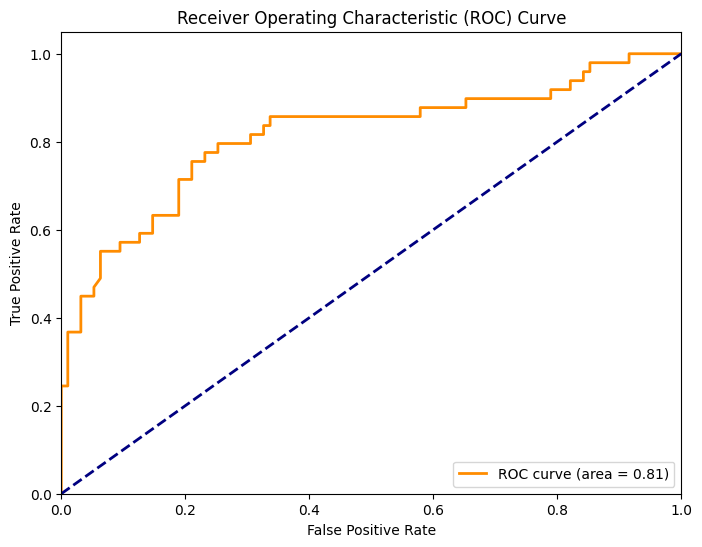

AUC Score: 0.81


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Make probability predictions on the test data
y_pred_prob = logreg_model  .predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")


In [46]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.77083333 0.78472222 0.76923077 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


In [47]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(logreg_model, X, y, cv=k)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross-validation scores: [0.75694444 0.77083333 0.78472222 0.76923077 0.81818182]
Mean Accuracy: 0.78
Standard Deviation: 0.02


> #### Confusion Matrix

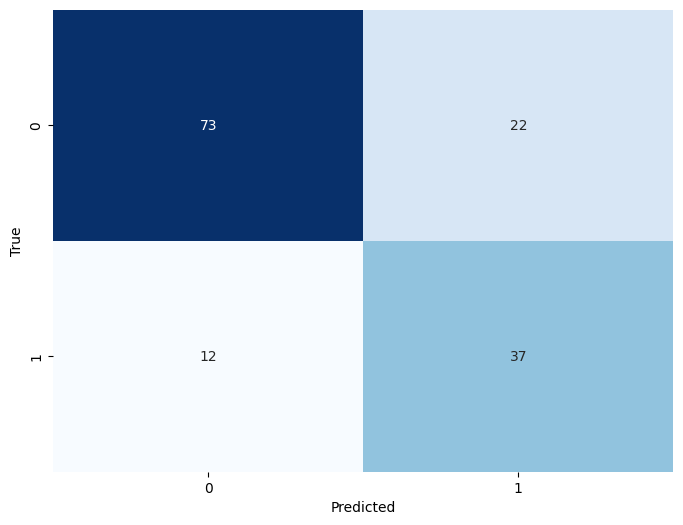

In [48]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### K neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
#Creating our KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
#Fitting our classifier to our data
knn.fit(X_train,y_train)
#Making predictions
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
#Printing our acuraccy results
print(f'KNN Acuraccy: {accuracy_knn}')
print(f'KNN Classification Report: {report_knn}')

KNN Acuraccy: 0.7986111111111112
KNN Classification Report:               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84        95
         1.0       0.68      0.78      0.72        49

    accuracy                           0.80       144
   macro avg       0.78      0.79      0.78       144
weighted avg       0.81      0.80      0.80       144



> ### K neighbors ->  K - cross Validation

In [50]:
#Performing cross validation
k = 5
scores_knn = cross_val_score(knn,X,y,cv=k)

#Printing knn cross-validation scores
print('KNN Cross-validation scores', scores_knn)

#Calculating and printing mean acuraccy and standard deviation
mean_accuracy_knn = scores_knn.mean()
std_deviation_knn = scores_knn.std()
print(f'KNN Mean Acuraccy: {mean_accuracy_knn:.2f}')
print(f'KNN Standard Deviation: {std_deviation_knn:.2f}')

KNN Cross-validation scores [0.75694444 0.75       0.76388889 0.77622378 0.79020979]
KNN Mean Acuraccy: 0.77
KNN Standard Deviation: 0.01


> #### ROC Curve and AUC score for KNN

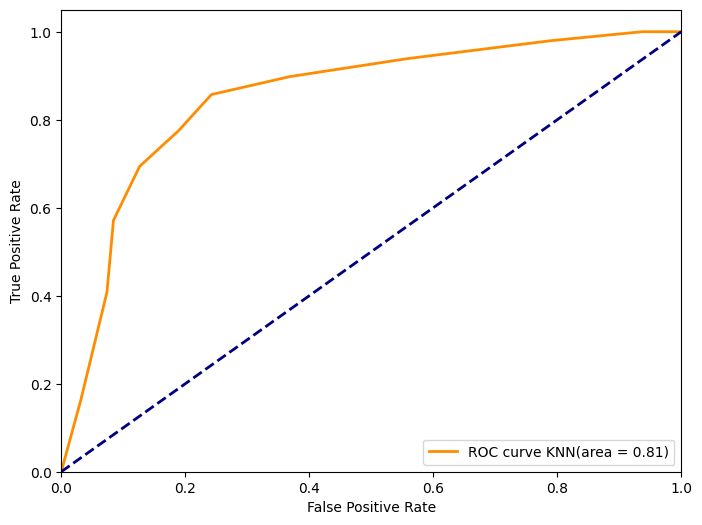

AUC Score KNN: 0.81


In [51]:
#Probability predictions on test data with knn
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
#Computing the ROC and AUC score
fpr_knn,tpr_knn,thresholds_knn = roc_curve(y_test,y_pred_prob_knn)
roc_auc_knn = auc(fpr,tpr)

#Plotting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_knn,tpr_knn,color = 'darkorange', lw = 2, label = 'ROC curve KNN(area = {:.2f})'.format(roc_auc_knn))
plt.plot([0,1],[0,1],color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title = ('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()
print(f'AUC Score KNN: {roc_auc_knn:.2f}')

> ### Confusion Matrix

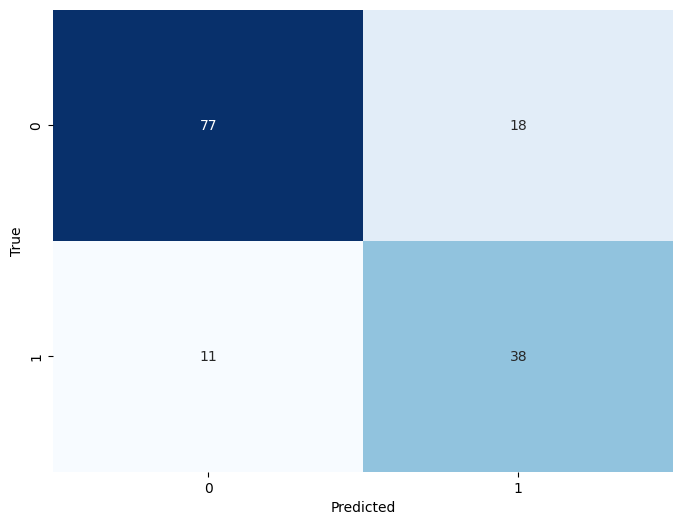

In [52]:
# Compute the confusion matrix
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title = ('Confusion Matrix knn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Support Vector Classifier

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report: \n{report}")

Accuracy: 0.7986111111111112
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84        95
         1.0       0.67      0.82      0.73        49

    accuracy                           0.80       144
   macro avg       0.78      0.80      0.79       144
weighted avg       0.82      0.80      0.80       144



#### Support Vector Classifier -> -cross validations

In [54]:
# Perform k-fold cross-validation
k = 5
scores = cross_val_score(svm_classifier, X_train, y_train, cv=k, scoring='accuracy')

print('Cross validation scores', scores)
# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = scores.mean()
std_deviation = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Cross validation scores [0.7987013  0.81699346 0.76470588 0.77124183 0.79084967]
Cross-validation scores: [0.7987013  0.81699346 0.76470588 0.77124183 0.79084967]
Mean Accuracy: 0.79
Standard Deviation: 0.02


#### Support Vector Classifier -> ROC curve and AUC score

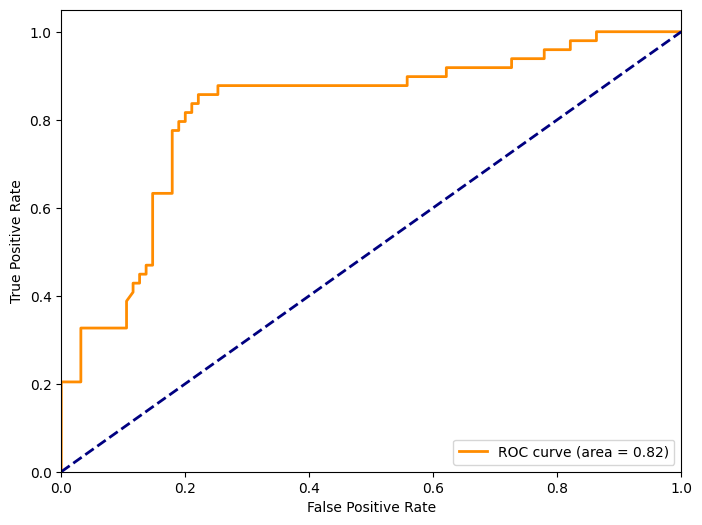

AUC Score: 0.82


In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Make probability predictions on the test data
y_pred_probability = svm_classifier.decision_function(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
print(f"AUC Score: {roc_auc:.2f}")

### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

In [57]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
146,3.0,1.0,-0.107881,0.0,0.0,-0.710027,3.0
416,2.0,0.0,0.591742,1.0,1.0,1.156515,3.0
48,3.0,1.0,-0.007934,2.0,0.0,0.338942,1.0
796,1.0,0.0,2.090933,0.0,0.0,0.660054,3.0
639,3.0,1.0,-0.007934,1.0,0.0,-0.082598,3.0
...,...,...,...,...,...,...,...
161,2.0,0.0,1.191419,0.0,0.0,-0.109042,3.0
365,3.0,1.0,0.191958,0.0,0.0,-0.751265,3.0
50,3.0,1.0,-2.106802,4.0,1.0,1.699571,3.0
133,2.0,0.0,0.092012,1.0,0.0,0.665403,3.0


In [58]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)

In [59]:
print(f"Accuracy: {accuracy_random_forest}")
print(f"Classification Report:\n{report_random_forest}")

Accuracy: 0.7430555555555556
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79        95
         1.0       0.60      0.73      0.66        49

    accuracy                           0.74       144
   macro avg       0.72      0.74      0.73       144
weighted avg       0.76      0.74      0.75       144



> #### K - Cross Validation

In [60]:
k = 10
scores = cross_val_score(random_forest, X_train, y_train, cv=k, scoring='accuracy')
print('Cross validation scores Random Forest:', scores)
print("Cross-validation scores:", scores)

Cross validation scores Random Forest: [0.87012987 0.83116883 0.81818182 0.87012987 0.8961039  0.92207792
 0.80263158 0.93421053 0.93421053 0.81578947]
Cross-validation scores: [0.87012987 0.83116883 0.81818182 0.87012987 0.8961039  0.92207792
 0.80263158 0.93421053 0.93421053 0.81578947]


In [61]:
mean_accuracy_rf = scores.mean()
std_deviation_rf = scores.std()
print(f"Mean Accuracy: {mean_accuracy_rf:.2f}")
print(f"Standard Deviation: {std_deviation_rf:.2f}")

Mean Accuracy: 0.87
Standard Deviation: 0.05


> ### AUC & ROC Curve

In [62]:
y_pred_prob_rf = random_forest.predict_proba(X_test)[:, 1]

In [63]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

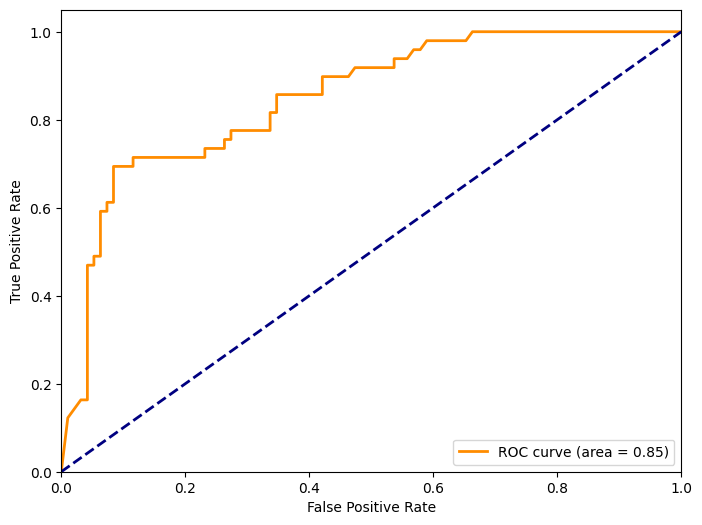

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [65]:
print(f"AUC Score: {roc_auc_rf:.2f}")

AUC Score: 0.85


In [66]:
y_pred_prob_rf

array([0.39933333, 0.92      , 0.21      , 0.82      , 0.04      ,
       0.00333333, 0.        , 0.32      , 0.        , 0.89      ,
       0.09416667, 0.        , 0.02      , 0.17934921, 0.11      ,
       0.95      , 0.05      , 0.02857143, 0.95416667, 0.01      ,
       0.58085714, 0.57      , 0.98      , 0.348     , 0.5865    ,
       0.085     , 0.78      , 0.        , 0.82      , 0.0381627 ,
       0.19      , 0.14416667, 0.02      , 0.02466667, 0.68      ,
       1.        , 0.12      , 0.3       , 0.95      , 0.19233333,
       0.3832381 , 0.968     , 0.58      , 0.9       , 0.88      ,
       0.73333333, 0.28140476, 0.61559524, 0.37070184, 0.86      ,
       0.00333333, 0.73      , 0.19233333, 0.21      , 0.06      ,
       0.11      , 0.        , 0.2       , 0.255     , 0.67      ,
       0.16727273, 0.69      , 0.87      , 0.02      , 0.25      ,
       0.        , 0.97      , 1.        , 0.63861905, 0.31825613,
       0.56      , 0.12      , 0.        , 0.03371429, 0.37070

> ### Confusion Matrix

In [67]:
threshold = 0.5
y_pred_rf = (y_pred_prob_rf > threshold).astype(int)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

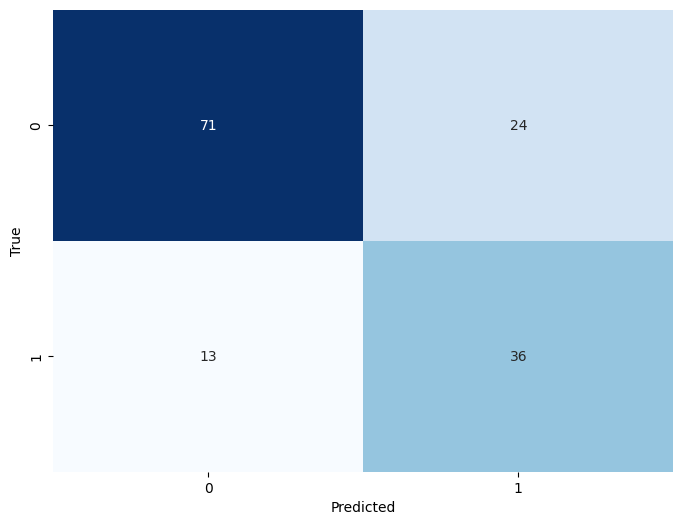

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()